## Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
<br>
There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] <br>
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
<br>
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
<br>
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
<br> <br>
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


## Atribute Information

### Input variables:
#### bank client data:
1. age (numeric) <br>
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>
5. default: has credit in default? (categorical: 'no','yes','unknown')
<br>
6. housing: has housing loan? (categorical: 'no','yes','unknown')
<br>
7. loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
<br>
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>
14. previous: number of contacts performed before this campaign and for this client (numeric)
<br>
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
#### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

## Import Modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('../dataset/bank_campaign/bank-additional/bank-additional-full.csv', delimiter=';')

In [3]:
df_test = pd.read_csv('../dataset/bank_campaign/bank-additional/bank-additional.csv', delimiter=';')

In [4]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Data Preprocessing - Data Train

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Identify Duplicate Data - Data Train

In [7]:
df_train.duplicated().any()

True

In [8]:
df_train.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [9]:
df_train[df_train.duplicated()].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [10]:
df_train.drop_duplicates(inplace=True)

In [11]:
df_train.duplicated().any()

False

### Identify Missing Value - Data Train

In [12]:
df_train.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

"False" menyatakan bahwa seluruh kolom pada data train ini tidak memiliki missing value atau nilai yang kosong.

### Drop Columns - Data Train

In [13]:
df_train = df_train.drop(columns=['duration'])

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

## Data Preprocessing - Data Test

### Identify Missing Value - Data Test

In [15]:
df_test.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

"False" menyatakan bahwa seluruh kolom pada data train ini tidak memiliki missing value atau nilai yang kosong.

### Identify Duplicated Data

In [16]:
df_test.duplicated().any()

False

"False" menyatakan bahwa seluruh kolom pada data train ini tidak memiliki duplikasi data

In [17]:
df_test = df_test.drop(columns=['duration'])

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [19]:
columns_num = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
columns_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_bool = ['y']

In [20]:
print(df_train.shape)
print(df_test.shape)

(41176, 20)
(4119, 20)


## Data Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_deposit = df_train['y'].value_counts()
df_deposit

no     36537
yes     4639
Name: y, dtype: int64

In [23]:
labels = df_train['y'].unique()
labels

array(['no', 'yes'], dtype=object)

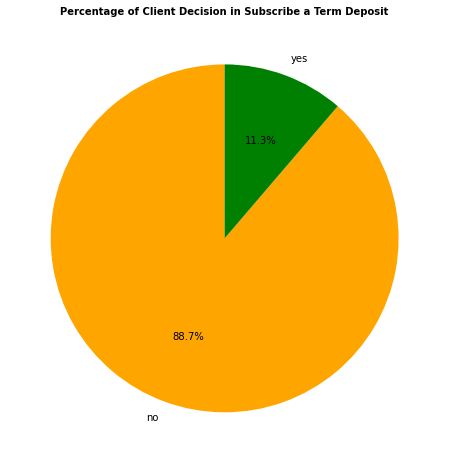

In [24]:
plt.figure(figsize=(8,8))
colors=['orange', 'green']
font = {'weight': 'bold','size': 10,}
ax = plt.axes()

plt.pie(df_deposit,
        labels=labels,
        colors=colors,
        startangle=90,
        autopct='%1.1f%%')

plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
plt.show()

Dari pie chart di atas dapat dilihat bahwa sebanyak 88.7% memilih untuk tidak menggunakan deposito dan hanya 11.3% yang memilih menggunakan deposito.

In [25]:
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
import sklearn.linear_model as linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [26]:
le = preprocessing.LabelEncoder()

In [27]:
for col in columns_cat:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])

In [28]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
df_train.loc[df_train['y'] == 'no', 'y'] = 0
df_train.loc[df_train['y']=='yes', 'y'] = 1

In [30]:
df_train['y'].unique()

array([0, 1], dtype=object)

In [31]:
df_test.loc[df_test['y'] == 'no', 'y'] = 0
df_test.loc[df_test['y']=='yes', 'y'] = 1

In [32]:
df_test['y'].unique()

array([0, 1], dtype=object)

In [33]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
df_train = df_train[df_train[col].isin([0,1])]
df_test = df_test[df_test[col].isin([0,1])]

In [35]:
df_train.shape

(39803, 20)

In [36]:
df_test.shape

(3977, 20)

## Create Data Train & Data Test

### X_train dan y_train

In [37]:
x_arr = df_train[columns_features].to_numpy()

In [38]:
x_arr

array([[ 5.6000e+01,  3.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 5.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 3.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 5.6000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 4.4000e+01,  9.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 7.4000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03]])

In [39]:
X_train = x_arr

In [40]:
y_arr = df_train['y'].astype('int')

In [41]:
y_arr.to_numpy()

array([0, 0, 0, ..., 0, 1, 0])

In [42]:
y_train = y_arr

### X_test dan y_test

In [43]:
x_arr_test = df_test[columns_features].to_numpy()

In [44]:
X_test = x_arr_test

In [45]:
y_arr_test = df_test['y'].astype('int')

In [46]:
y_arr_test

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 3977, dtype: int32

In [47]:
y_arr_test.to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
y_test = y_arr_test

## Classification

### Logistic Regression

#### Generating Model

In [49]:
model_linear_regression = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)

In [50]:
model_linear_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
y_pred_lr = model_linear_regression.predict(X_test)

#### Evaluate Model

In [52]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred_lr))

Accuracy 0.9094795071662057


Dengan data ini, Logistic Regression mempunyai tingkat akurasi sebesar 90.4%

C:\Users\elwhite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


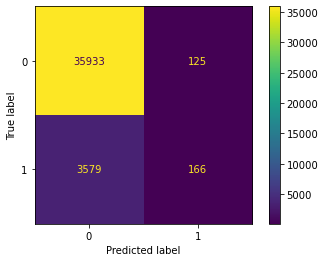

In [53]:
plot_confusion_matrix(model_linear_regression, X_train, y_train)

Matriks yang diperoleh menunjukan hasil berikut:
<ul>
<li> 35.933 prediksi true negatif : 35.933 data prediksi benar dinyatakan sebagai Nol
<li> 3.579 prediksi false nefatif : 3.579 data prediksi salah dinyatakan sebagai Nol
<li> 123 prediksi false positif : 125 data prediksi salah dinyatakan sebagai satu 
<li> 166 prediksi true positif : 166 data prediksi benar dinytakan sebagai satu
</ul>

### K-Nearest Neighbor (KNN)

#### Checking Error Rate

In [54]:
error = []

In [55]:
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

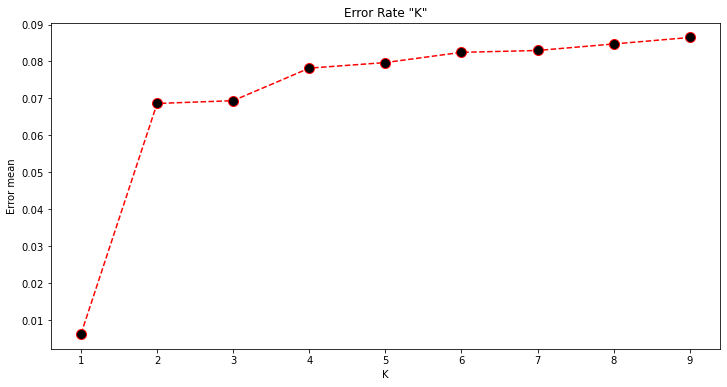

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('Error Rate "K"')
plt.xlabel('K')
plt.ylabel('Error mean')

Berdasarkan angka Error Rate "K", nilai K diputuskan pada 6 karena tidak ada peningkatan signifikan terhadap kesalahan berarti dari 7 ke atas.



#### Generating Model

In [57]:
model_knn = KNeighborsClassifier(n_neighbors=6)

In [58]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [59]:
y_predict_knn = model_knn.predict(X_test)

#### Evaluate Model

In [60]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict_knn))

Accuracy:  0.9175257731958762


Dari model yang telah kita latih, kita mendapatkan tingkat klasifikasi sebesar 91%

C:\Users\elwhite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


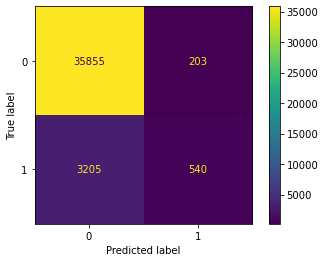

In [61]:
plot_confusion_matrix(model_knn, X_train, y_train)

<li> 35.855 prediksi True Negatif : 35.855 data prediksi benar dinyatakan sebagai Nol
<li> 3.205 prediksi False Negatif : 3.205 data prediksi salah dinyatakan sebagai Nol
<li> 203 prediksi False Positif : 203 data prediksi salah dinyatakan sebagai Satu
<li> 540 prediksi True Positif : 540 data prediksi benar dinyatakan sebagai Satu

### Support Vector Machine (SVM)

#### Generating Model

In [62]:
model_svm_linear = svm.SVC(kernel='linear')

In [63]:
model_svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
y_pred_linear = model_svm_linear.predict(X_test)

#### Evaluate the Model

In [65]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_linear))

Accuracy:  0.9072164948453608


Tingkat klasifikasi dengan model SVM Linear mendapatkat 90.7%

C:\Users\elwhite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


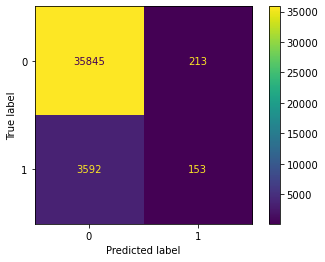

In [66]:
plot_confusion_matrix(model_svm_linear, X_train, y_train)

<li> 35.845 prediksi True Negatif: 35.845 data prediksi <b>benar</b> dinyatakan sebagai Nol 
<li> 3.592 prediksi False Negatif: 3.592 data prediksi <b>salah</b> dinyatakan sebagai Nol
<li> 213 prediksi False Positif: 213 data prediksi <b>salah</b> dinyatakan sebagai Satu
<li> 153 prediksi True Positif: 153 data prediksi <b>benar</b> dinyatakan sebagai Satu

### Decision Tree Classifier

#### Generating Model

In [67]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [68]:
model_decision_tree = DecisionTreeClassifier(max_depth=1, criterion='gini')

In [69]:
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [70]:
y_pred_decision_tree = model_decision_tree.predict(X_test)

#### Evaluate Model

In [71]:
metrics.accuracy_score(y_test, y_pred_decision_tree)

0.9097309529796329

Hasil yang didapatkan pada model Decision Tree sangat besar, yaitu 90%. akurasi ini tergolong cukup besar

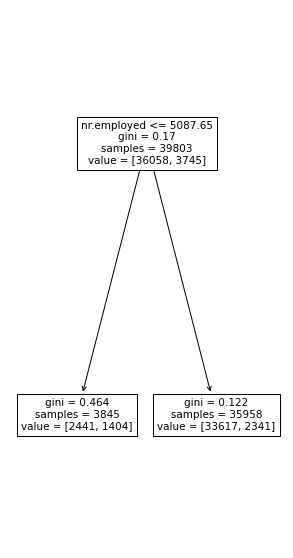

In [72]:
figure, ax = plt.subplots(figsize=(5, 10))
tree.plot_tree(model_decision_tree, feature_names=columns_features)

plt.show()

C:\Users\elwhite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


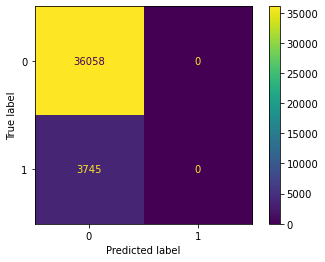

In [73]:
plot_confusion_matrix(model_decision_tree, X_train, y_train)

<li> 36.058 prediksi True Negatif: 36.058 data prediksi <b>benar</b> dinyatakan sebagai Nol
<li> 3.745 prediksi False Negatif: 3745 data prediksi <b>salah</b> dinyatakan sebagai Nol
<li> 0 prediksi False Positif: 0 data prediksi
<li> 0 prediksi True Positif: 0 data prediksi

### Random Forest

#### Generating Model - All Features

In [74]:
model_random_forest = RandomForestClassifier(n_estimators=100)

In [75]:
model_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
y_predict_rf = model_random_forest.predict(X_test)

#### Evaluate Model - All Features

In [77]:
metrics.accuracy_score(y_test, y_predict_rf)

0.9944681921046015

#### Finding the Important Features

In [78]:
feature_important = pd.Series(model_random_forest.feature_importances_, index=columns_features).sort_values(ascending=False)

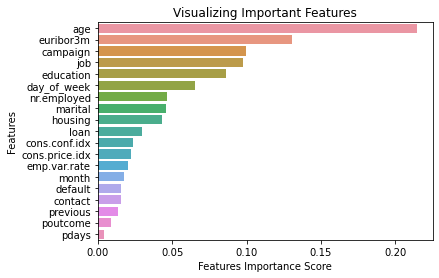

In [79]:
sns.barplot(x=feature_important, y=feature_important.index)

plt.xlabel('Features Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

plt.show()

#### Create new Features

In [80]:
columns_imp_features = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'month', 'day_of_week', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [81]:
x_arr_imp = df_train[columns_imp_features].to_numpy()
x_arr_imp_test = df_test[columns_imp_features].to_numpy()
X_test_important_features = x_arr_imp_test
X_train_important_features = x_arr_imp

#### Generating Model - Important Features

In [82]:
model_random_forest_imp = RandomForestClassifier(n_estimators=100)
model_random_forest_imp.fit(X_train_important_features, y_train)

RandomForestClassifier()

In [83]:
y_pred1 = model_random_forest_imp.predict(X_test_important_features)

#### Evaluate Model

In [84]:
metrics.accuracy_score(y_test, y_pred1)

0.991450842343475

Penggunaan feature <b>finding important features</b> kurang efektif. Buktinya accuracy tidak terlalu berpengaruh secara signifikan, tapi dapat memperingan cara kerja model dengan membuang beberapa features yang tidak terlalu berpengaruh dalam melakukan fitting.

C:\Users\elwhite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


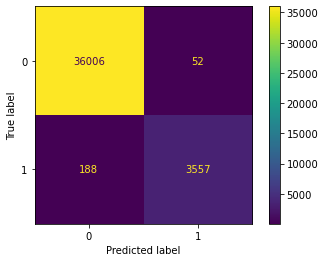

In [93]:
plot_confusion_matrix(model_random_forest, X_train, y_train)

<li> 36.006 prediksi True Negatif: 36.006 data prediksi <b>benar</b> dinyatakan sebagai Nol
<li> 188 prediksi False Negatif: 188 data prediksi <b>salah</b> dinyatakan sebagai Nol
<li> 52 prediksi False Positif: 52 data prediksi <b>salah</b> dinyatakan sebagai Satu
<li> 3.557 prediksi True Positif: 3.557 data prediksi <b>benar</b> dinyatakan sebagai Satu
<br>
Model ini merupakan model dengan akurasi paling tinggi diantara model yang lain, dengan tingkat akurasi sebesar 99.1%

### Naive Bayes

#### Generating Model

In [85]:
model_naive_bayes = GaussianNB()

In [87]:
model_naive_bayes.fit(X_train, y_train)

GaussianNB()

In [88]:
y_pred_naive_bayes = model_naive_bayes.predict(X_test)

#### Evaluate Model

In [89]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_naive_bayes))

Accuracy:  0.8239879306009555


C:\Users\elwhite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


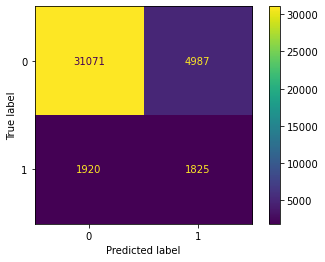

In [92]:
plot_confusion_matrix(model_naive_bayes, X_train, y_train)

<li> 31.071 Prediksi True Negatif: 31.071 Data <b>benar</b> dinyatakan sebaga Nol
<li> 1.920 Prediksi False Negatif: 1.920 Data <b>salah</b> dinyatakan sebaga Nol
<li> 4.987 Prediksi False Positif: 4.987 Data <b>salah</b> dinyatakan sebaga Satu
<li> 1.825 Prediksi True Positif: 1.825 Data <b>benar</b> dinyatakan sebaga Satu

### List of Accuracy Model

In [95]:
list_model = [model_linear_regression, model_knn, model_svm_linear, model_decision_tree, model_random_forest, model_naive_bayes]

In [100]:
result = []
for model in list_model:
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    result.append(
        {
            model: {
                'Score Train ': score_train,
                'Score Test ': score_test
            }
        }
    )
result

[{LogisticRegression(max_iter=1000): {'Score Train ': 0.9069416878124764,
   'Score Test ': 0.9094795071662057}},
 {KNeighborsClassifier(n_neighbors=6): {'Score Train ': 0.914378313192473,
   'Score Test ': 0.9175257731958762}},
 {SVC(kernel='linear'): {'Score Train ': 0.9044041906388965,
   'Score Test ': 0.9072164948453608}},
 {DecisionTreeClassifier(max_depth=1): {'Score Train ': 0.9059116147024093,
   'Score Test ': 0.9097309529796329}},
 {RandomForestClassifier(): {'Score Train ': 0.9939703037459487,
   'Score Test ': 0.9944681921046015}},
 {GaussianNB(): {'Score Train ': 0.8264703665552848,
   'Score Test ': 0.8239879306009555}}]

## Conclusion

Untuk memprediksi apakah nasabah pada suatu bank akan melakukan <b>Deposito</b>, maka dari modeling diatas algoritma yang paling sesuai untuk digunakan adalah <b>Model Random Forest Classifier</b>. Dapat dilihat dari Score dari Train dan Score dari Test yang menunjukan tingkat akurasi paling tinggi yaitu menyentuh angka <b>99%</b> dan ini merupakan angka yang sangat tinggi untuk sebuah modeling. Hampir seluruh prediksi dari algoritma ini dinyatakan benar oleh prediktor. 

C:\Users\elwhite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


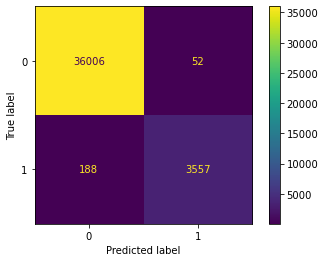

In [101]:
plot_confusion_matrix(model_random_forest, X_train, y_train)

<li> 36.006 prediksi True Negatif: 36.006 data prediksi <b>benar</b> dinyatakan sebagai Nol
<li> 188 prediksi False Negatif: 188 data prediksi <b>salah</b> dinyatakan sebagai Nol
<li> 52 prediksi False Positif: 52 data prediksi <b>salah</b> dinyatakan sebagai Satu
<li> 3.557 prediksi True Positif: 3.557 data prediksi <b>benar</b> dinyatakan sebagai Satu
<br>
Model ini merupakan model dengan akurasi paling tinggi diantara model yang lain, dengan tingkat akurasi sebesar 99.1%